<a href="https://colab.research.google.com/github/sean20005/ST1-Capstone/blob/main/ST1_Capstone_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ST1 Capstone assignment (capstone programming project)**

---



This project is based around the Airbnb price prediction data available from Kaggle repository (https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction)

•	It contains the details of 150 houses and apartments.

•	My project task is to predict the price of the Airbnb listings based on its features.

•	To solve this problem, I will follow a step-by-step approach to create a prediction model.

STEP 1: Reading the dataset

In [ ]:
import pandas as pd
from pandas.core.frame import DataFrame

# Set path
dataset_path = ('/content/train.csv')

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(df.head())

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict         True  ...  40.696524  -73.991617   
1  Real Bed       

Key observations about the data description

•	The dataset contains 5 rows and 29 columns.

•	The dataset contains 29 attributes.

•	Property type: This attribute likely describes the type of property being listed on Airbnb, such as apartment, house, condo, villa, etc. It provides information about the general category or classification of accommodation.

•	Room Type: This attribute describes the type of room or space being offered for rent within the property. Common room types include entire home/apartment, private room, shared room, etc. This attribute provides information about the level of privacy and exclusivity of the accommodation.

•	Amenities: This attribute likely lists the amenities or features available in the Airbnb listing, such as Wi-Fi, kitchen, parking, pool, etc. It provides information about the amenities and facilities that guests can expect during their stay.

These attributes are important for analyzing and predicting Airbnb prices because they are important aspects of the listings that can influence pricing decisions. Analyzing these attributes can be used to predict Airbnb prices accurately.


STEP 2: Problem Statement Definition

The problem can be defined as building a predictive model that can accurately estimate the price of Airbnb listings based on various features or attributes associated with each listing. In other words, given a set of features such as property type, room type, amenities, location, number of bedrooms, etc., the goal is to develop a model that can predict the price at which each listing is offered for rent.


STEP 3: Target variable identification

The target variable in this case would be the **price** (log_price) of the Airbnb listings.


STEP 4: Visualizing the distribution for the target variable.

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

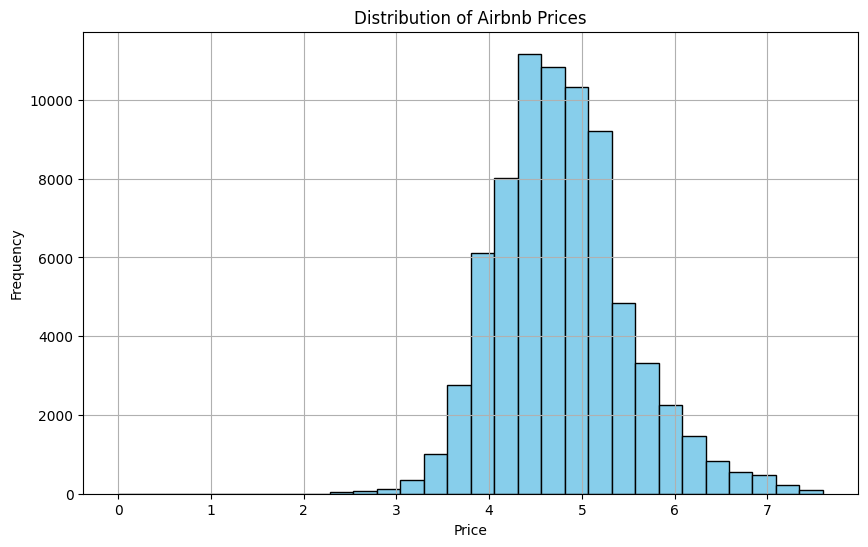

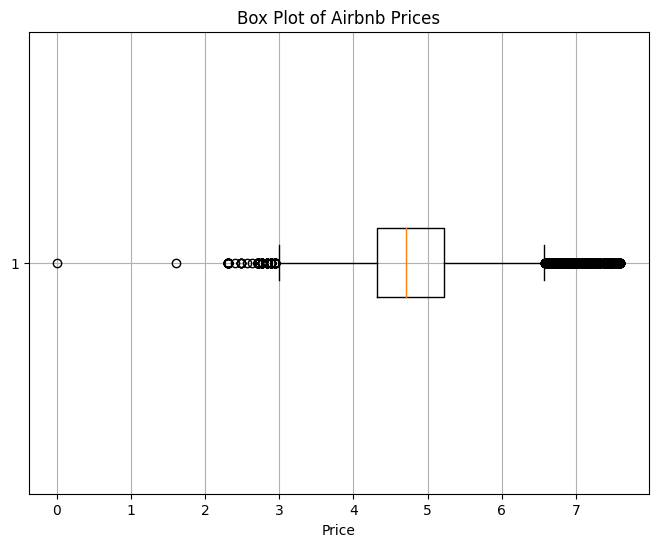

In [ ]:
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt


dataset_path = 'train.csv'

# Read the DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(df.head())

# Since 'log_price' is the column containing Airbnb prices
prices = df['log_price']

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(prices, vert=False)
plt.title('Box Plot of Airbnb Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()


**STEP** 5: Data exploration at the basic level

In [ ]:
import pandas as pd


train_data = pd.read_csv("train.csv")
print("First few rows of the dataset:") #To make sure dataset runs properly
print(train_data.head())
prices = train_data['log_price']

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(train_data.describe())

# Check the data types of each column
print("\nData types of each column:")
print(train_data.dtypes)

# Check the distribution of the target variable (price)
print("\nDistribution of Airbnb prices:")
print(train_data['log_price'].describe())
print("\nSkewness of Airbnb prices:")
print(train_data['log_price'].skew())

First few rows of the dataset:
         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524 

Dataset Overview:
- Total rows: 13
- Total columns: 39

Column-wise Observations:

1. Column: Log price
   - Data Type: log price
   - Unique Values: None
   - Missing Values: None
   - Summary Statistics:
     - Mean: 4.782069
     - Median: 4.709530
     - Min: 0.000000
     - Max: 7.600402
   - Observation:
     - The distribution of Airbnb prices appears to be moderately right-skewed, with a positive skewness value of 0.515. This suggests that while the majority of prices are around the median value, there is a tendency for higher-priced listings to be present in the dataset, leading to a right skew in the distribution


STEP 6: Identifying and Rejecting useless columns

After some analysis I have identified some potentially useless columns



*   **id**: May not provide useful enough information for price prediction and analyzing
*   **Thumbnail** **URL**: Image analysis is most likely not useful in the price prediction

*   **name**: The name of the listing may not provide significant predictive power for Airbnb prices and could be considered less useful.


*  **zipcode**: Categorical column





**STEP** 7: Visual Exploratory Data Analysis of data (with Histogram
and Barcharts)



*   This step will involve visualing the distribution of listings for the qualitative columns and distribution of the airbnb prices using a histogram and bar chart



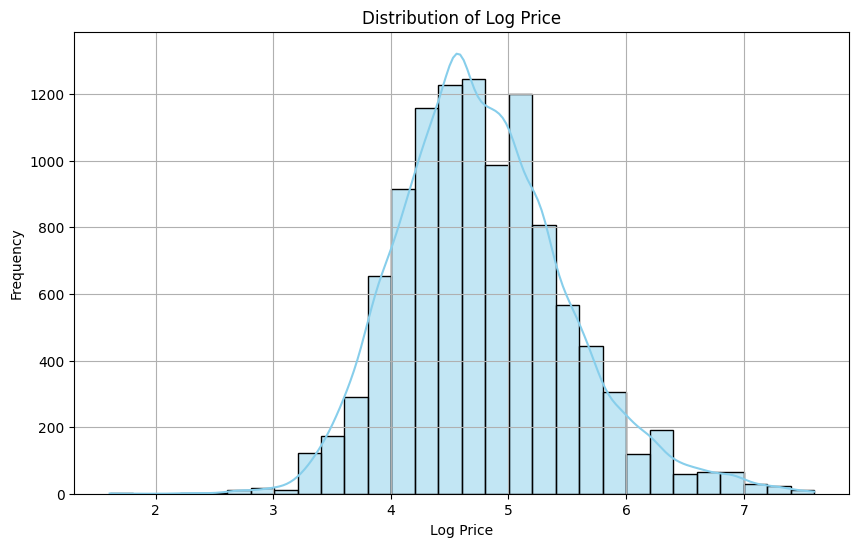

<ipython-input-5-3bbe9228a456>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


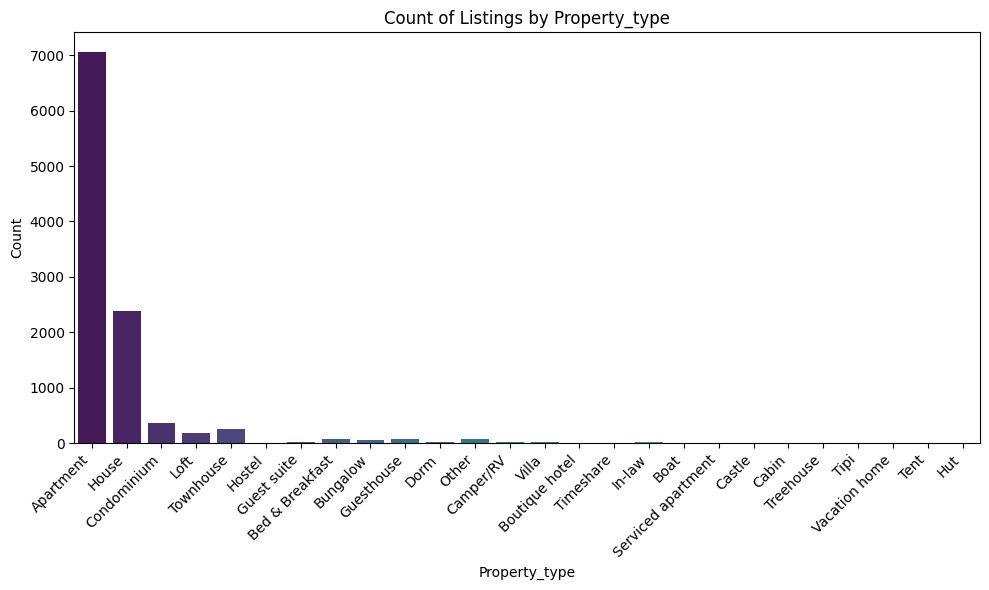

<ipython-input-5-3bbe9228a456>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


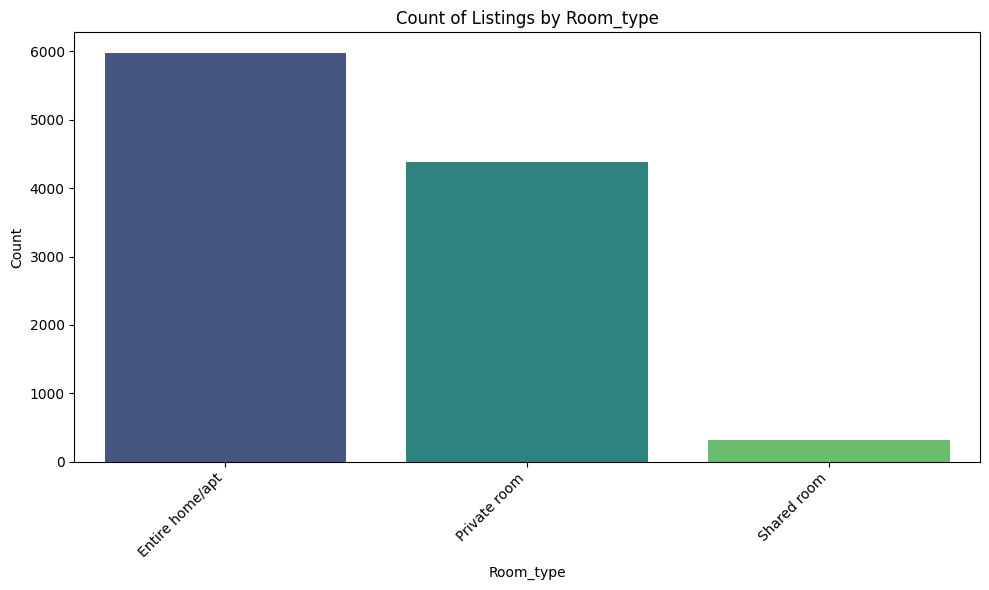

<ipython-input-5-3bbe9228a456>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


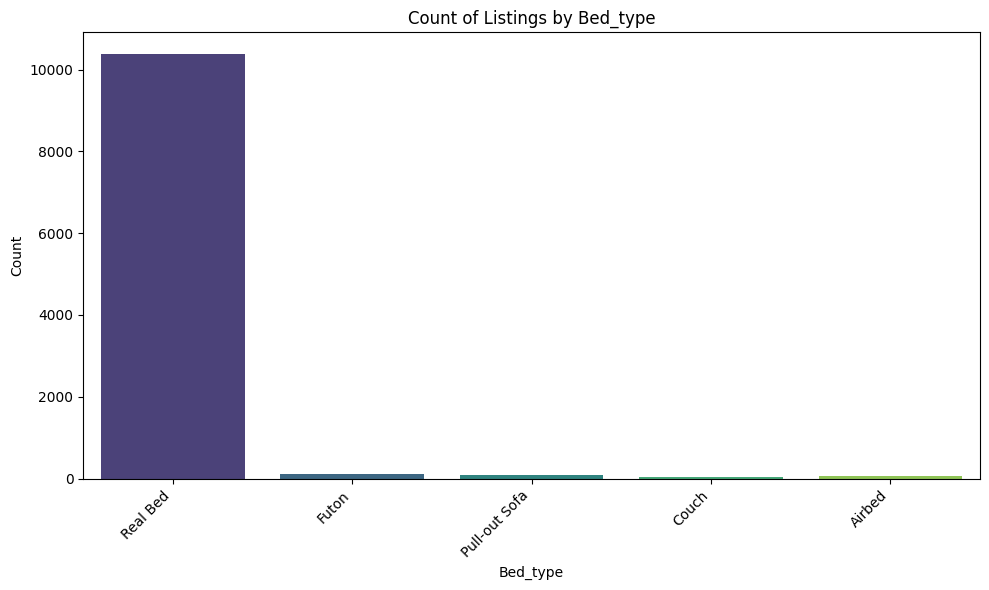

<ipython-input-5-3bbe9228a456>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


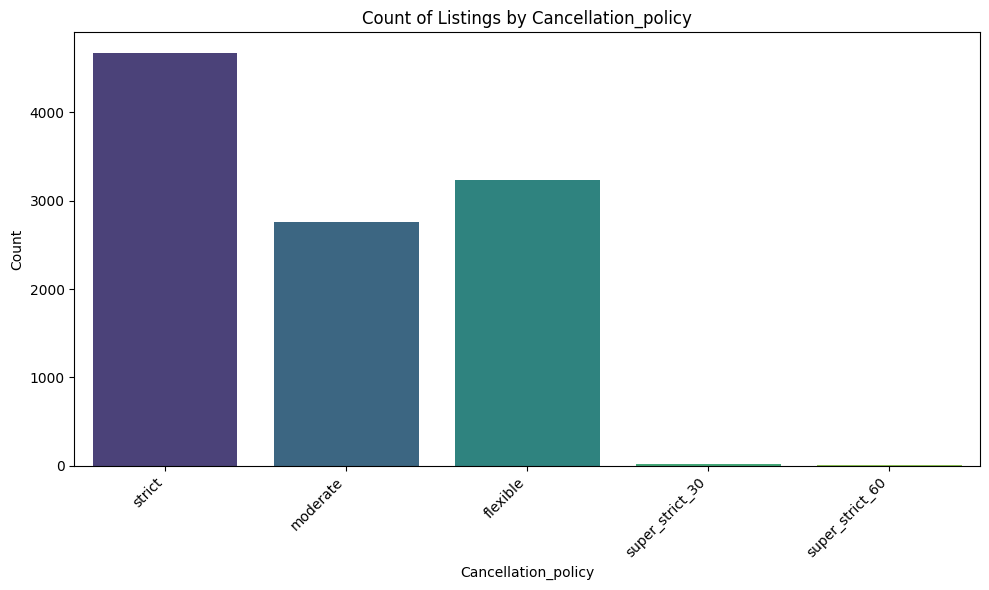

<ipython-input-5-3bbe9228a456>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


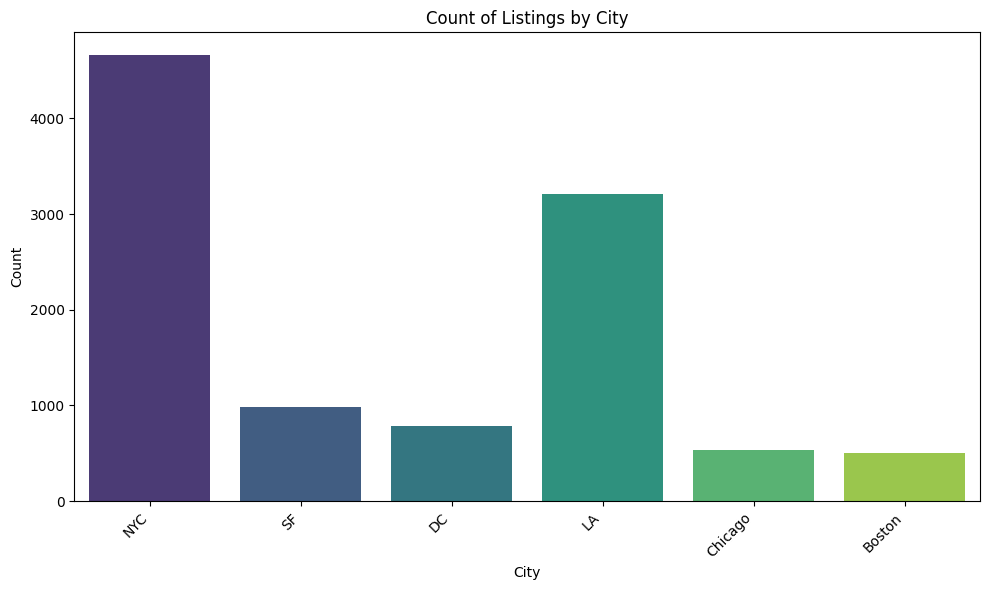

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train_data = pd.read_csv('train.csv')
# Subset of qualitative columns
qualitative_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

# Histogram for log_price
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='log_price', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bar charts for qualitative columns
for col in qualitative_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x=col, palette='viridis')
    plt.title(f'Count of Listings by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Observations** **from** **the** **visual** **data** **exploration**



*   **Distribution of Log Price (Histogram)**:
The histogram of log-transformed prices shows that the distribution is approximately normal, with a peak around a certain value and decreasing frequencies as prices move away from the peak.
The distribution appears slightly right-skewed, as indicated by the tail extending more towards higher log price values
*   **Count of Listings by Property Type, Room Type, Bed Type, Cancellation Policy, and City (Bar Charts):**

Property Type: The most common property types among Airbnb listings are apartments and houses, followed by others such as condos, villas, or lofts.

Room Type: Entire home/apartment listings are the most prevalent, followed by private rooms and shared rooms.

Bed Type: Most listings have a real bed, while other types such as sofa beds or pull-out sofas are less common.

Cancellation Policy: The listings with a strict cancellation policy seem to be preferable (suprisingly) compared to the flexible and moderate policies

City: New york city has the highest listings with the place with he second highest being Los angeles.

**Overall Observation:**
The distribution of Airbnb prices appears to be fairly diverse, with a wide range of prices observed across listings.




**STEP** 8: **Feature Selection based on data distribution**

In this step a histogram is made for every continous/numerical variable in the dataset in order to analyze distribution and identify outliers

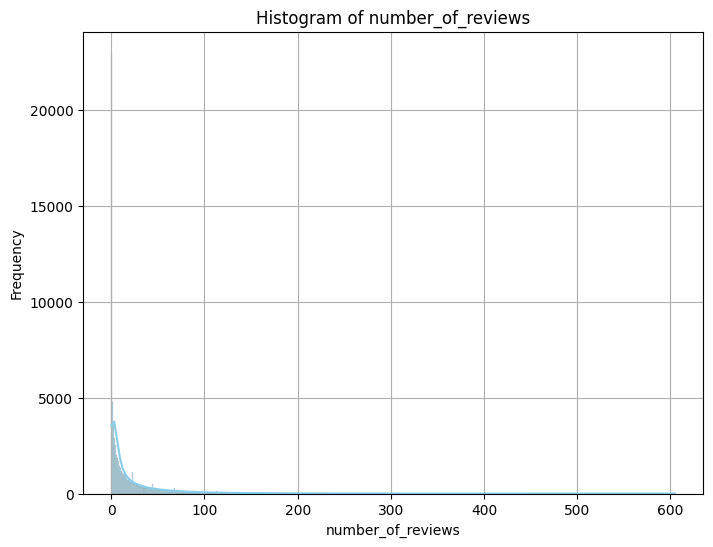

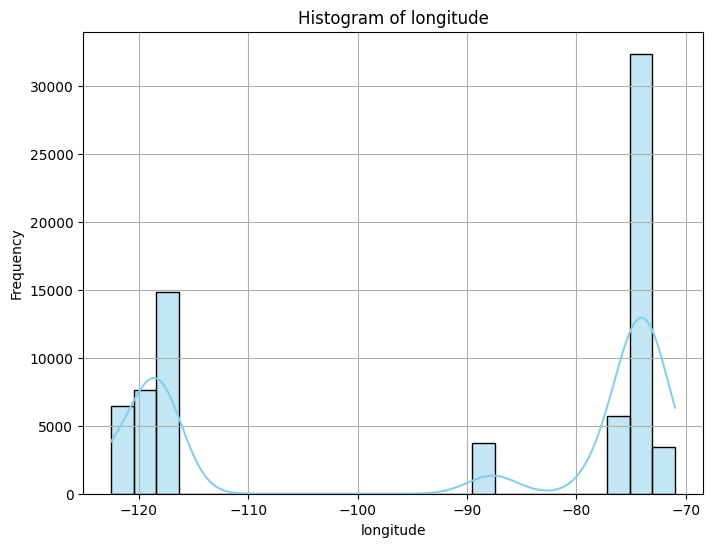

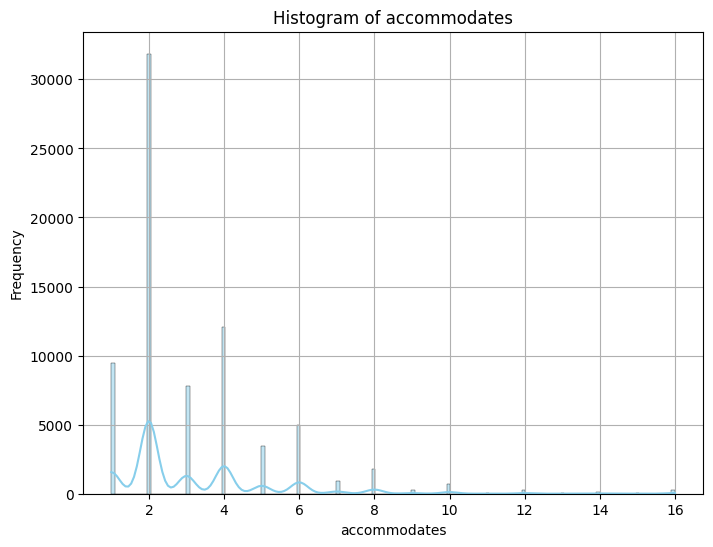

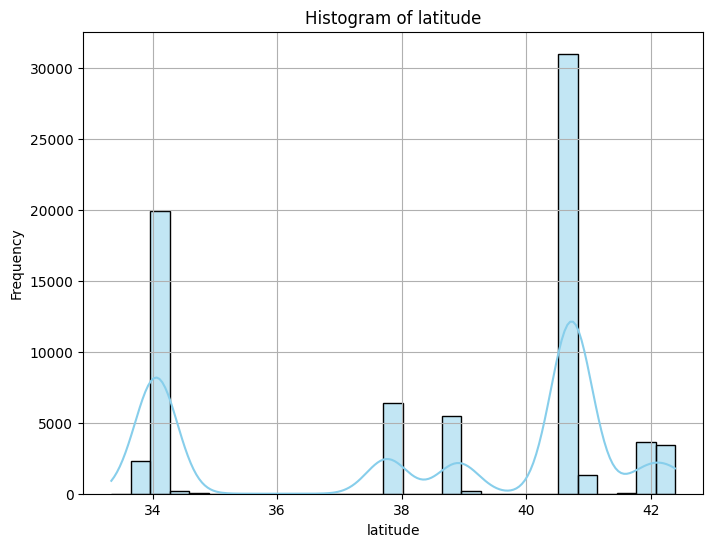

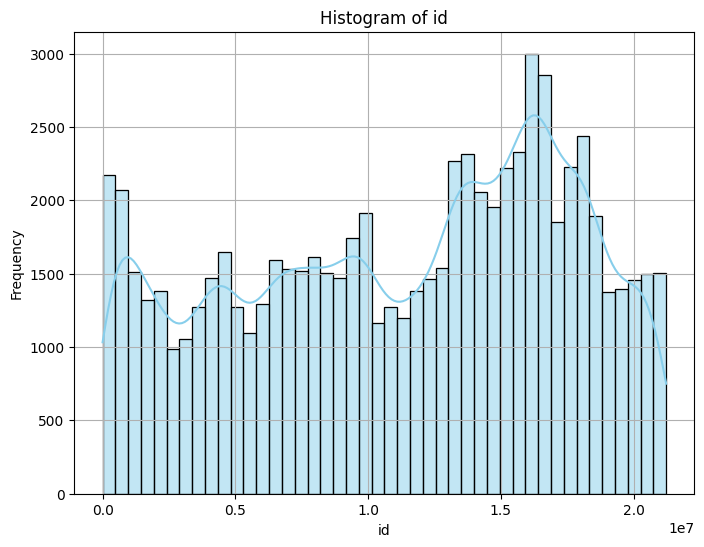

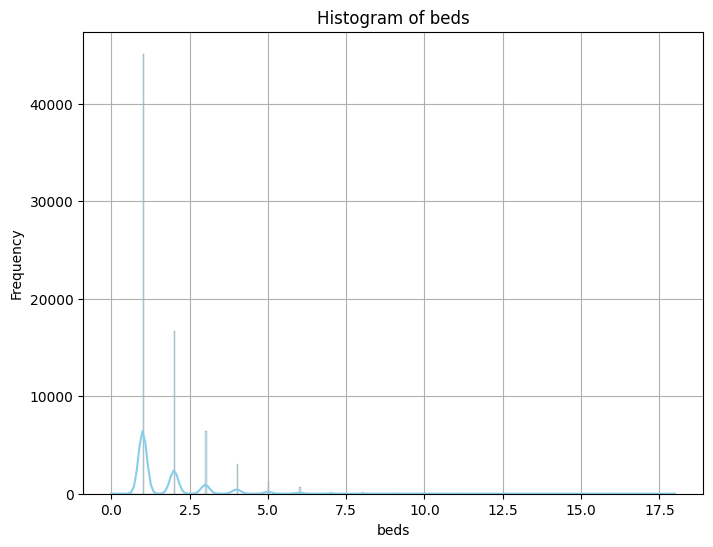

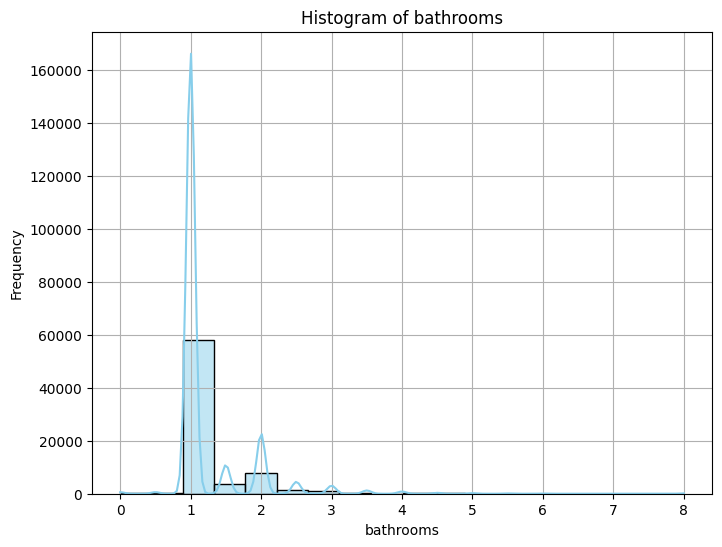

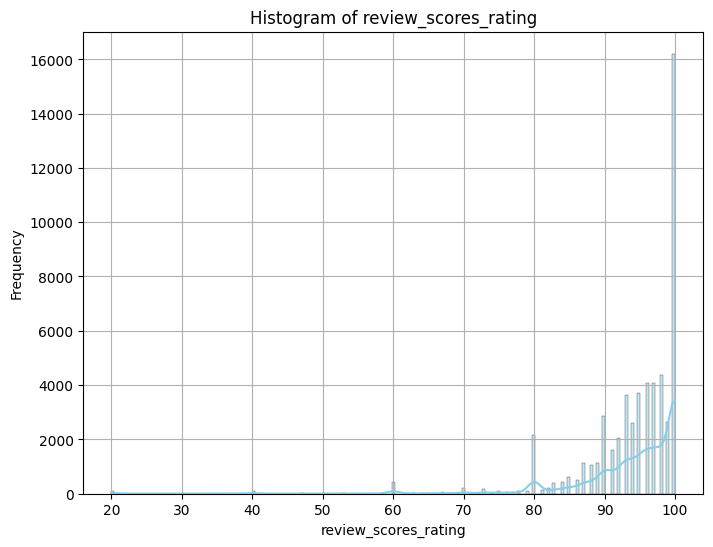

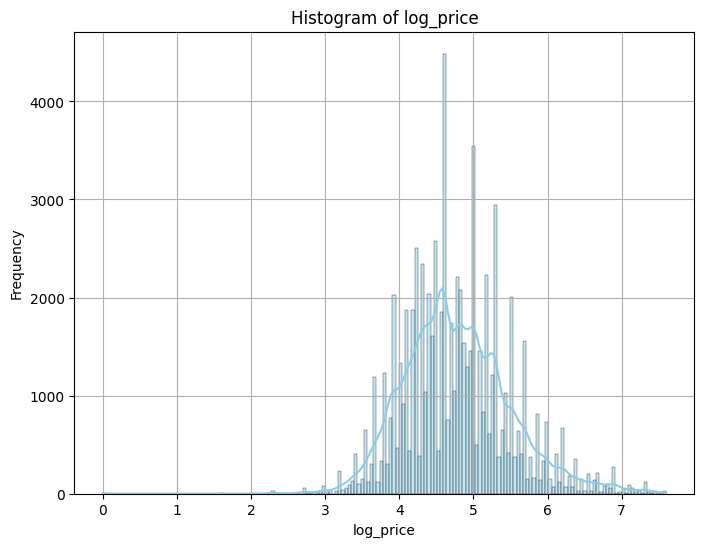

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv("train.csv")

# Select numerical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Number of numerical features to visualize
num_features_to_visualize = 9

# Randomly select numerical features
selected_numerical_columns = np.random.choice(numerical_columns, size=num_features_to_visualize, replace=False)

# Plot histograms for selected numerical features
for col in selected_numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Observations from Step 8



*   Each histogram shows the distribution for a continous variable, with the X axis showing us the range of values and Y axis showing the number of values in that range
*   The log price variable has Good distribution


*   Most of the others have good distribution except latitude, longtitude which have outliers and are not really useful variables in price prediction





**STEP 9**: Removal of outliers and missing values

I have decided to remove the outlier records since there are only 2 rows (longitude and latitude) with outliers, and aren't that valuable to the price prediction model.

**STEP 10:** Visual and Statistic Correlation analysis for selection of
best features

In this step we will visualize the relation between the target variable and each of the other features(columns) that could be useful in predicting airbnb prices using scatterplots and measure the strength of relation using Pearson's Coefficient

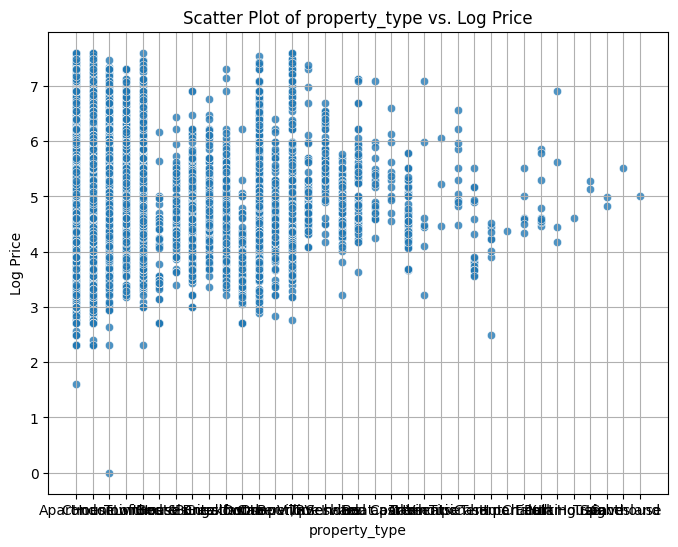

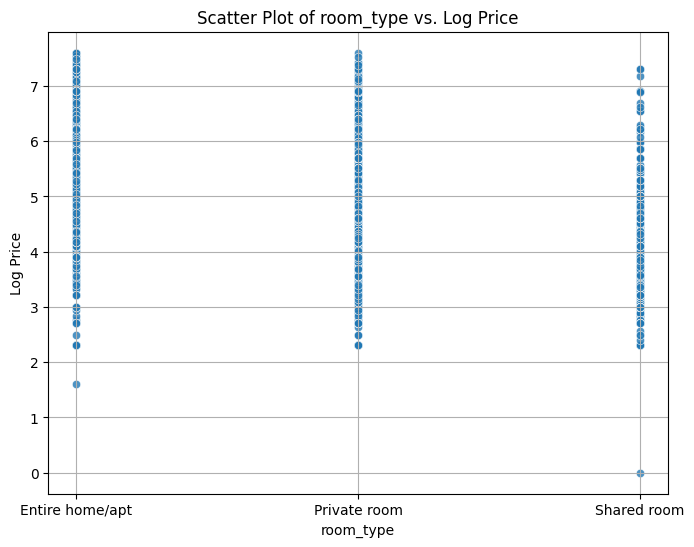

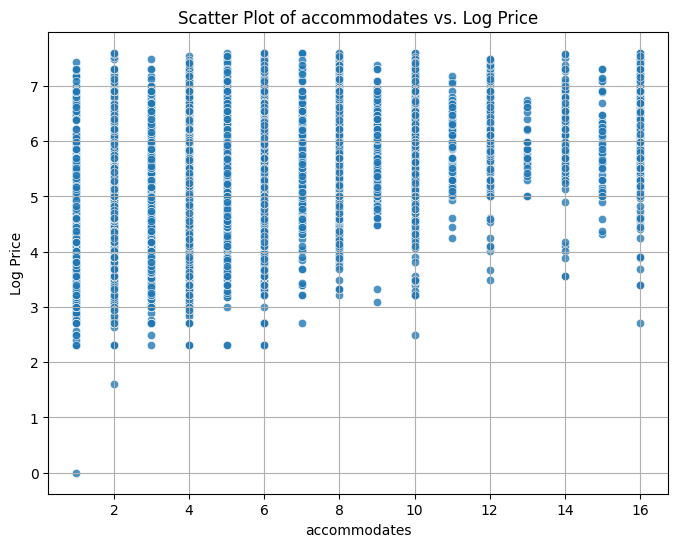

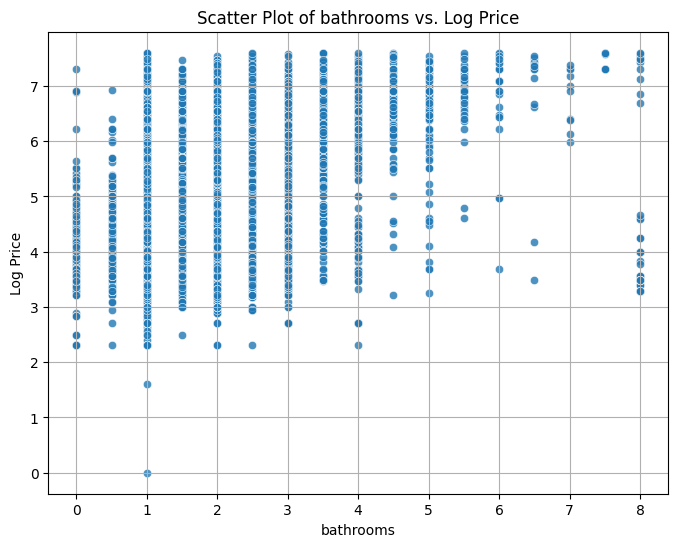

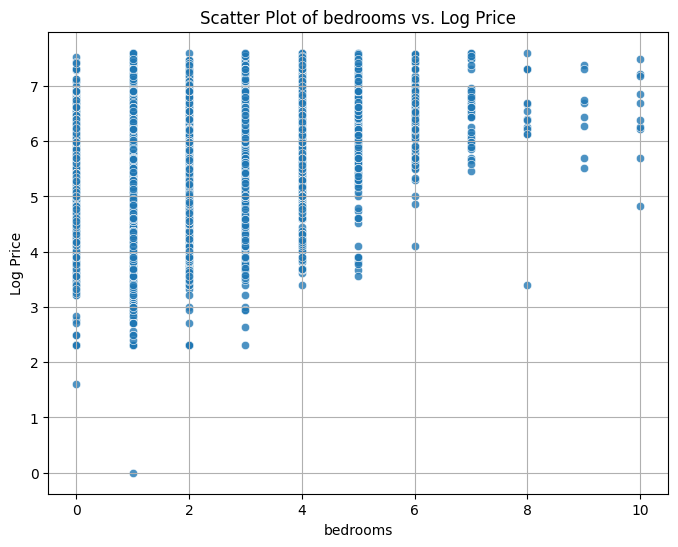

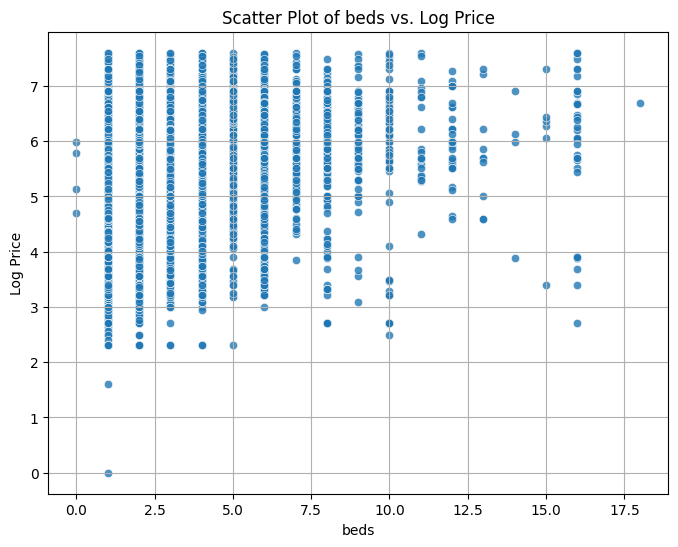

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv ('train.csv')
# Selected features
selected_features = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'cleaning_fee']

# Scatter plots for each selected feature
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='log_price', alpha=alpha_value)
    plt.title(f'Scatter Plot of {feature} vs. Log Price')
    plt.xlabel(feature)
    plt.ylabel('Log Price')
    plt.grid(True)
    plt.show()


Pearson's Coefficient

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
# Selected features
selected_features = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee']

# Convert categorical variables to one-hot encoded representation
df_encoded = pd.get_dummies(df[selected_features], columns=selected_features)

# Add the target variable to DataFrame
df_encoded['log_price'] = df['log_price']

# Calculate Pearson's correlation coefficient for each feature
pearson_correlation = {}
for feature in df_encoded.columns:
    pearson_corr = df_encoded[[feature, 'log_price']].corr().iloc[0, 1]
    pearson_correlation[feature] = pearson_corr

# Print Pearson's correlation coefficients
print("Pearson's correlation coefficients:")
for feature, corr in pearson_correlation.items():
    print(f"{feature}: {corr}")


Pearson's correlation coefficients:
property_type_Apartment: -0.0452163661394917
property_type_Bed & Breakfast: -0.02495136946787144
property_type_Boat: 0.017296300707652486
property_type_Boutique hotel: 0.012820500116808246
property_type_Bungalow: 0.00011769614944768236
property_type_Cabin: -0.005893136029008065
property_type_Camper/RV: -0.008933230455153424
property_type_Casa particular: -0.0020483917490390947
property_type_Castle: 0.010826153062665864
property_type_Cave: 0.0009218644653881453
property_type_Chalet: -0.0002225586880209091
property_type_Condominium: 0.0657260020536627
property_type_Dorm: -0.06326951998256505
property_type_Earth House: 0.005154561371546397
property_type_Guest suite: -0.0036690554438221236
property_type_Guesthouse: -0.011108054720097446
property_type_Hostel: -0.048635462719820374
property_type_House: 0.011227875467091503
property_type_Hut: -0.010996311278125023
property_type_In-law: 0.0014926875631148912
property_type_Island: 0.001170358449272674
propert

**Scatter plot and Pearson's Coefficient Observations**

**Scatter Plot**

Most of the features do not seem to follow a trend easily observable and may not be the best for ML model building.

**Pearson's Coefficient**

Based on the Pearson's correlation coefficients provided, we can observe the correlations between the target variable (log_price) and all other predictor variables (features). Here are the observations:

1. **Strong Positive Correlation**:
   - Features with strong positive correlations (close to 1) with the target variable (log_price) include:
     - `room_type_Entire home/apt` (0.6025): This suggests that the price tends to be higher for entire home/apartment listings compared to private or shared rooms.

2. **Strong Negative Correlation**:
   - Features with strong negative correlations (close to -1) with the target variable (log_price) include:
     - `room_type_Private room` (-0.5316): This indicates that the price tends to be lower for private room listings compared to entire home/apartment or shared rooms.
     - `accommodates_1` (-0.3208): This suggests that listings accommodating only one person tend to have lower prices.

3. **Moderate Correlations**:
   - Features with moderate correlations (closer to 0.5 or -0.5) with the target variable (log_price) include:
     - `accommodates_2` (-0.2780): Listings accommodating two people also have a negative correlation with price, although not as strong as for private rooms.
     - `bathrooms_2.0` (0.2012): Listings with two bathrooms tend to have higher prices compared to listings with fewer bathrooms.
     - `bedrooms_2.0` (0.2932) and `bedrooms_3.0` (0.2989): Listings with two or three bedrooms have positive correlations with price.

4. **Other Observations**:
   - Some features have weak correlations (close to 0) with the target variable, indicating little to no linear relationship.
   - The presence or absence of a `cleaning_fee` seems to have a moderate correlation with price, albeit in opposite directions for `False` and `True` values.

Based on these observations, we can identify which columns/features/predictors are related to the target variable (log_price) and may be important for predicting Airbnb prices. Features with stronger correlations are likely to have more predictive power in the model.

Selecting the final predictors/features for Machine Learning/AI Model

After the extensive tests and observtions with the data and statistic analysis, the selected final features/predictors are


*   property_type


*   room_type
*   accommodates

*   bedroom
*   bathroom





**STEP 11:** Data Conversion to numeric values for machine
learning/predictive analysis

Now for this step we will be converting the Categorical columns to numeric values using one-hot encoding.

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')

# One-hot encoding for categorical columns
df_one_hot = pd.get_dummies(df, columns=['property_type', 'city', 'room_type'])

print (df_one_hot.head())

         id  log_price                                          amenities  \
0   6901257   5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1   6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2   7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3  13418779   6.620073  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4   3808709   4.744932  {TV,Internet,"Wireless Internet","Air conditio...   

   accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  \
0             3        1.0  Real Bed              strict          True   
1             7        1.0  Real Bed              strict          True   
2             5        1.0  Real Bed            moderate          True   
3             4        1.0  Real Bed            flexible          True   
4             2        1.0  Real Bed            moderate          True   

                                         description first_review  ...  \
0  Beautiful, sunl

**STEP 12: Training/Testing Sampling and K-fold cross validation**

In this step we will split the data into training and testing samples

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['property_type', 'room_type', 'accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors].values
y = df[TargetVariable].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


**STEP 13: Investigating multiple regression algorithms**



In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')

# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df[TargetVariable]

# Initialize a HistGradientBoostingRegressor model
RegModel = HistGradientBoostingRegressor()

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(RegModel, X , y, cv=10, scoring='neg_mean_absolute_percentage_error')
Accuracy_Values = -Accuracy_Values  # negate the scores to get positive MAPE values

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Calculating Mean and Median Accuracy
mean_accuracy = np.mean(Accuracy_Values)
median_accuracy = np.median(Accuracy_Values)

print('\nMean Accuracy:', mean_accuracy)
print('Median Accuracy:', median_accuracy)



Accuracy values for 10-fold Cross Validation:
 [8.78535690e-02 2.54103799e+12 8.81889847e-02 8.94761288e-02
 8.83956539e-02 8.75813166e-02 8.75762296e-02 8.82088466e-02
 8.61227334e-02 8.98917688e-02]

Final Average Accuracy of the model: 254103798700.87

Mean Accuracy: 254103798700.87286
Median Accuracy: 0.08819891563461646


**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')

# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df[TargetVariable]

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize a DecisionTreeRegressor model
RegModel = DecisionTreeRegressor()

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(RegModel, X_imputed, y, cv=10, scoring='neg_mean_absolute_percentage_error')
Accuracy_Values = -Accuracy_Values  # negate the scores to get positive MAPE values

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



Accuracy values for 10-fold Cross Validation:
 [8.80460380e-02 2.54078698e+12 8.81887863e-02 8.97040804e-02
 8.86749852e-02 8.78470382e-02 8.77658501e-02 8.86431184e-02
 8.63588030e-02 9.00940109e-02]

Final Average Accuracy of the model: 254078698022.31


Plotting the Decision tree

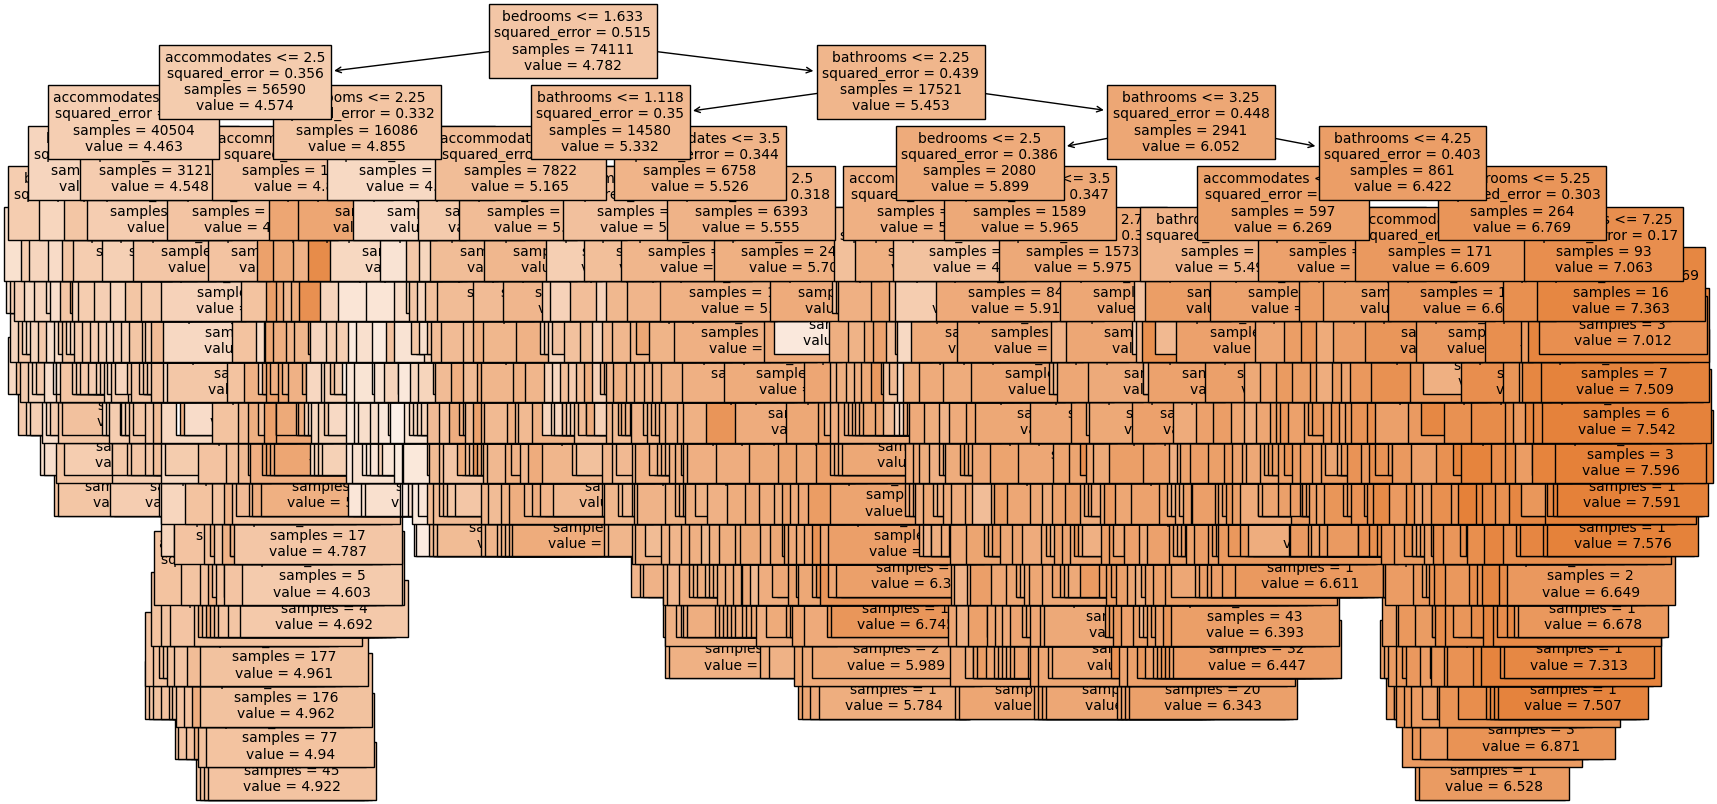

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the DecisionTreeRegressor model to the entire dataset
RegModel.fit(X_imputed, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(RegModel, feature_names=Predictors, filled=True, fontsize=10)
plt.show()


Random Tree Regressor

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd

df = pd.read_csv('train.csv')

# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df[TargetVariable]

# Initialize Imputer Transformer
imputer = SimpleImputer(strategy='mean')

# Initialize HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor()

# Create pipeline
pipeline = Pipeline(steps=[('imputer', imputer), ('regressor', reg)])

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(pipeline, X , y, cv=10)
print('\nR2 values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average R2 of the model:', round(Accuracy_Values.mean(),2))



R2 values for 10-fold Cross Validation:
 [0.41875165 0.44926221 0.44114275 0.43442213 0.43921502 0.43283942
 0.43051315 0.43873472 0.43754328 0.42678856]

Final Average R2 of the model: 0.43


AdaBoost Algorithm

Mean Accuracy on test data: 99.90821108863298
Median Accuracy on test data: 92.67579492982622

Accuracy values for 10-fold Cross Validation:
 [9.17014996e-02 2.79768030e+12 9.22571559e-02 9.36667354e-02
 9.29456145e-02 9.14896254e-02 9.17750002e-02 9.25013617e-02
 9.04549038e-02 9.39949283e-02]

Final Average Accuracy of the model: 279768030140.08


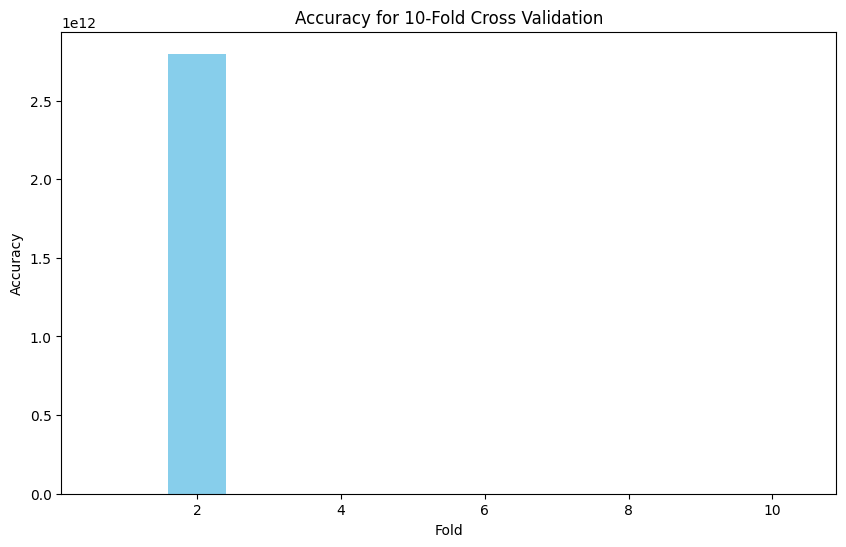

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df[TargetVariable]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize AdaBoostRegressor
adaBoostRegressor = AdaBoostRegressor()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Fit the model to the training data
adaBoostRegressor.fit(X_train, y_train)

# Predict on the testing data
prediction = adaBoostRegressor.predict(X_test)

# Calculate Mean Accuracy on test data
MAPE = mean_absolute_percentage_error(y_test, prediction)
Accuracy = 100 - MAPE

# Calculate Median Accuracy on test data
MedianMAPE = np.median(np.abs(y_test - prediction) / y_test) * 100
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Model Validation using 10-fold Cross Validation
Accuracy_Values = cross_val_score(adaBoostRegressor, X_imputed, y, cv=10, scoring='neg_mean_absolute_percentage_error')
Accuracy_Values = -Accuracy_Values  # negate the scores to get positive MAPE values

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), Accuracy_Values, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for 10-Fold Cross Validation')
plt.show()


XGBoost Regressor

Mean Accuracy on test data: 99.91208705843248
Median Accuracy on test data: 93.0972478026452

Accuracy values for 10-fold Cross Validation:
 [8.79122574e-02 2.54088057e+12 8.81280611e-02 8.95955856e-02
 8.85050082e-02 8.77337913e-02 8.77158159e-02 8.84803680e-02
 8.62776236e-02 9.00189409e-02]

Final Average Accuracy of the model: 254088057185.92


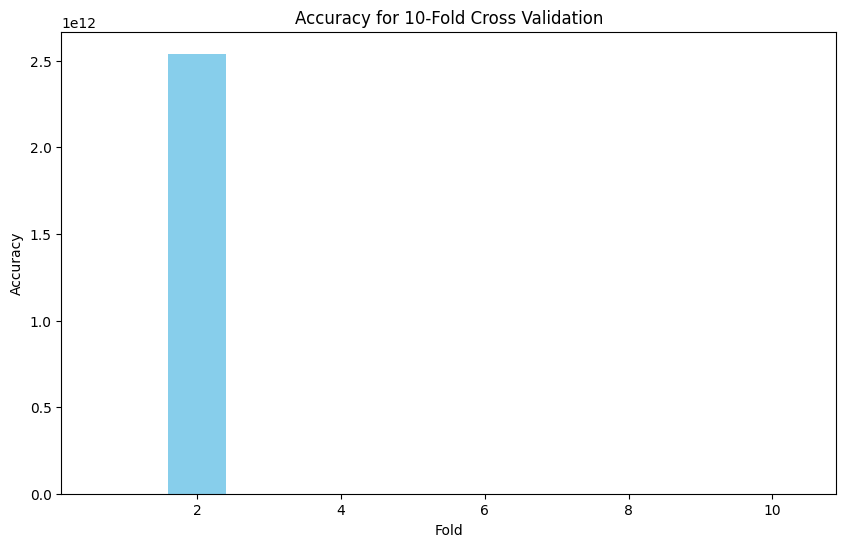

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df[TargetVariable]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize XGBoost Regressor
xgb_regressor = XGBRegressor()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the testing data
prediction = xgb_regressor.predict(X_test)

# Calculate Mean Accuracy on test data
MAPE = mean_absolute_percentage_error(y_test, prediction)
Accuracy = 100 - MAPE

# Calculate Median Accuracy on test data
MedianMAPE = np.median(np.abs(y_test - prediction) / y_test) * 100
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Model Validation using 10-fold Cross Validation
Accuracy_Values = cross_val_score(xgb_regressor, X_imputed, y, cv=10, scoring='neg_mean_absolute_percentage_error')
Accuracy_Values = -Accuracy_Values  # negate the scores to get positive MAPE values

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), Accuracy_Values, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for 10-Fold Cross Validation')
plt.show()


Decision tree

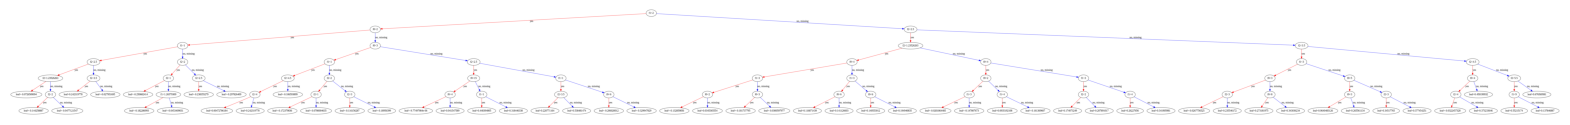

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree of the XGBoost model
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(xgb_regressor, num_trees=0, ax=ax)
plt.show()


K-Nearest Neighbour

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df[TargetVariable]

# Define preprocessing steps with imputation for numerical predictors
preprocessor = SimpleImputer(strategy='mean')

# Initialize KNeighborsRegressor model
knn_regressor = KNeighborsRegressor()

# Define pipeline with preprocessing and KNN regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', knn_regressor)])

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(pipeline, X , y, cv=10, scoring='r2')

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average R2 of the model:', round(Accuracy_Values.mean(), 2))



Accuracy values for 10-fold Cross Validation:
 [0.30494849 0.19047506 0.33500641 0.34832368 0.31078845 0.29893158
 0.28820935 0.28117756 0.31495564 0.32673249]

Final Average R2 of the model: 0.3


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')

# Separate Target Variable and Predictor Variables
TargetVariable = 'log_price'
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df[TargetVariable]

# Define preprocessing steps with imputation for numerical predictors
preprocessor = SimpleImputer(strategy='median')

# Initialize SVR model with a smaller value for C
svr_regressor = SVR(C=1.0)

# Define pipeline with preprocessing and SVR regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr_regressor)])

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(pipeline, X , y, cv=10, scoring='r2')

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average R2 of the model:', round(Accuracy_Values.mean(), 2))


**STEP 14: Deployment of the best model in production**

In this step we will be selecting the algorithm with the best average accuracy results, which in this case the XGBoost regressor algorithm has been chosen due to having the highest average R2 value  

Cross Validating the Model with Less Predictors

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd

df = pd.read_csv('train.csv')

# Define the list of predictors with fewer features
Predictors = ['accommodates', 'bedrooms', 'bathrooms']

X = df[Predictors]
y = df['log_price']

# Initialize a HistGradientBoostingRegressor model
RegModel = HistGradientBoostingRegressor()

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
Accuracy_Values = -Accuracy_Values  # negate the scores to get positive MAPE values

print('\nAccuracy values for 10-fold Cross Validation with fewer predictors:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model with fewer predictors:', round(Accuracy_Values.mean(), 2))



Accuracy values for 10-fold Cross Validation with fewer predictors:
 [8.78372521e-02 2.54498766e+12 8.81525792e-02 8.94727485e-02
 8.83653896e-02 8.75854223e-02 8.75599815e-02 8.82646066e-02
 8.61244488e-02 8.99577867e-02]

Final Average Accuracy of the model with fewer predictors: 254498766271.34


 Retraining the final model using 100% data

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd

# Assuming df is your DataFrame containing the entire dataset
df = pd.read_csv('train.csv')

# Define the predictors and target variable
Predictors = ['accommodates', 'bedrooms', 'bathrooms']
TargetVariable = 'log_price'

# Separate the predictors and target variable
X = df[Predictors]
y = df[TargetVariable]

# Initialize the HistGradientBoostingRegressor model
RegModel = HistGradientBoostingRegressor()

# Fit the model to the entire dataset
RegModel.fit(X, y)

# Now the model has been trained on the entire dataset


HistGradientBoostingRegressor()

In [ ]:
import pickle
import os

# Saving the XGBoost model as a serialized file
with open('Airbnb_Price_Prediction_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(xgb_regressor, fileWriteStream)
    fileWriteStream.close()

print('Serialized file of the XGBoost model is saved at Location:', os.getcwd())


Serialized file of the XGBoost model is saved at Location: /content


Calling the Function for New Data

In [ ]:
# Importing required libraries
import pandas as pd

# Creating new sample data
NewSampleData = pd.DataFrame(data=[[4.98, 6.575, 15.3], [4.98, 3.2, 10.3]], columns=['accommodates', 'bedrooms', 'bathrooms'])

print("New Sample Data:")
print(NewSampleData)

# Defining the function to predict results
def FunctionPredictResult(InputData):

    # Load preprocessing steps and model
     with open('Airbnb_Price_Prediction_Model.pkl', 'rb') as fileReadStream:
        loaded_model = pickle.load(fileReadStream)

New Sample Data:
   accommodates  bedrooms  bathrooms
0          4.98     6.575       15.3
1          4.98     3.200       10.3


Github repository location : https://github.com/sean20005/ST1-Capstone